Cargamos las librerias que vamos a utilizar para hacer el EDA

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from wordcloud import WordCloud

Cargamos los archivos Parque para comenzar la visualizacion de los datos

In [3]:
user_games_final = pd.read_parquet("C:\\Users\\Dr-Pc\\OneDrive\\Escritorio\\PI MLOps - STEAM\\user_games_final.parquet")
user_items_final = pd.read_parquet("C:\\Users\\Dr-Pc\\OneDrive\\Escritorio\PI MLOps - STEAM\\user_items_final.parquet")
user_reviews_final = pd.read_parquet("C:\\Users\\Dr-Pc\\OneDrive\\Escritorio\\PI MLOps - STEAM\\user_reviews_final.parquet")

Miramos por arriba cuantos datos contiene cada archivo y el tipo de dato que tiene cada columna

In [6]:
user_games_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22528 entries, 0 to 22527
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genres        22528 non-null  object
 1   Item Name     22528 non-null  object
 2   Item ID       22528 non-null  object
 3   Developer     22528 non-null  object
 4   Release Date  22528 non-null  object
dtypes: object(5)
memory usage: 880.1+ KB


In [7]:
user_items_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   User ID            object 
 1   Item ID            object 
 2   Item Name          object 
 3   Play Time Forever  float64
dtypes: float64(1), object(3)
memory usage: 155.5+ MB


In [8]:
user_reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48498 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User ID             48498 non-null  object
 1   Item ID             48498 non-null  object
 2   Recommend           48498 non-null  bool  
 3   Sentiment Analysis  48498 non-null  int64 
 4   Year                48498 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.9+ MB


Vemos la cantidad de juegos dependiendo el genero

In [60]:
cantidad_generos= user_games_final["Genres"].value_counts() # obtenemos la cantidad de juegos por género
cantidad_generos.to_frame

<bound method Series.to_frame of Genres
Action                                                                 1577
Action, Indie                                                          1395
Simulation                                                             1266
Strategy                                                                931
Action, Adventure, Indie                                                926
                                                                       ... 
Action, Adventure, Casual, Indie, Racing, Simulation, Sports              1
Action, Massively Multiplayer, RPG, Strategy                              1
Adventure, Casual, Indie, Racing, RPG, Simulation, Sports, Strategy       1
Action, Free to Play, Simulation                                          1
Adventure, Casual, RPG, Simulation, Early Access                          1
Name: count, Length: 804, dtype: int64>

Aca vemos como se ven los datos con sus repectivas columnas 

In [9]:
user_games_final.head(3)

,Genres,Item Name,Item ID,Developer,Release Date
0,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,761140,Kotoshiro,2018
1,"Free to Play, Indie, RPG, Strategy",Ironbound,643980,Secret Level SRL,2018
2,"Casual, Free to Play, Indie, Simulation, Sports",Real Pool 3D - Poolians,670290,Poolians.com,2017


In [10]:
user_items_final.head(3)

,User ID,Item ID,Item Name,Play Time Forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0


In [12]:
user_reviews_final.head(3)

,User ID,Item ID,Recommend,Sentiment Analysis,Year
0,76561197970982479,1250,True,2,2011
1,76561197970982479,22200,True,2,2011
2,76561197970982479,43110,True,2,2011


Ahora nos toca chequear los datos nulos, duplicados, faltantes y su tipo de dato de cada archivo user_games_final

Datos nulos:

In [17]:
# Verificar la presencia de datos nulos
datos_nulos = user_games_final.isnull().sum()

# Imprimir la información sobre los datos nulos
print("Resumen de datos nulos en user_games_final:")
print(datos_nulos)

Resumen de datos nulos en user_games_final:
Genres          0
Item Name       0
Item ID         0
Developer       0
Release Date    0
dtype: int64


Datos duplicados:

In [20]:

# Verificar la presencia de datos duplicados
datos_duplicados = user_games_final.duplicated()

# Imprimir la información sobre los datos duplicados
print("Resumen de datos duplicados en user_games_final:")
print(datos_duplicados)


Resumen de datos duplicados en user_games_final:
0        False
1        False
2        False
3        False
4        False
         ...  
22523    False
22524    False
22525    False
22526    False
22527    False
Length: 22528, dtype: bool


Datos faltantes:

In [22]:
# Verificar la presencia de datos faltantes
datos_faltantes = user_games_final.isna().sum()

# Imprimir la información sobre los datos faltantes
print("Resumen de datos faltantes en user_games_final:")
print(datos_faltantes)


Resumen de datos faltantes en user_games_final:
Genres          0
Item Name       0
Item ID         0
Developer       0
Release Date    0
dtype: int64


Tipo de datos:

In [23]:
# Verificar el tipo de dato de cada columna
tipos_de_datos = user_games_final.dtypes

# Imprimir información sobre el tipo de dato de cada columna
print("Tipos de datos en user_games_final:")
print(tipos_de_datos)


Tipos de datos en user_games_final:
Genres          object
Item Name       object
Item ID         object
Developer       object
Release Date    object
dtype: object


Ahora nos toca chequear los datos nulos, duplicados, faltantes y su tipo de dato de cada archivo de user_items_final

Datos nulos:

In [24]:
# Verificar la presencia de datos nulos
datos_nulos = user_items_final.isnull().sum()

# Imprimir la información sobre los datos nulos
print("Resumen de datos nulos en user_items_final:")
print(datos_nulos)

Resumen de datos nulos en user_items_final:
User ID              0
Item ID              0
Item Name            0
Play Time Forever    0
dtype: int64


Datos duplicados:

In [25]:

# Verificar la presencia de datos duplicados
datos_duplicados = user_items_final.duplicated()

# Imprimir la información sobre los datos duplicados
print("Resumen de datos duplicados en user_items_final:")
print(datos_duplicados)


Resumen de datos duplicados en user_items_final:
0          False
1          False
2          False
3          False
4          False
           ...  
5094100    False
5094101    False
5094102    False
5094103    False
5094104    False
Length: 5094105, dtype: bool


Datos faltantes:

In [26]:
# Verificar la presencia de datos faltantes
datos_faltantes = user_items_final.isna().sum()

# Imprimir la información sobre los datos faltantes
print("Resumen de datos faltantes en user_items_final:")
print(datos_faltantes)


Resumen de datos faltantes en user_items_final:
User ID              0
Item ID              0
Item Name            0
Play Time Forever    0
dtype: int64


Tipo de datos:

In [27]:
# Verificar el tipo de dato de cada columna
tipos_de_datos = user_items_final.dtypes

# Imprimir información sobre el tipo de dato de cada columna
print("Tipos de datos en user_items_final:")
print(tipos_de_datos)


Tipos de datos en user_items_final:
User ID               object
Item ID               object
Item Name             object
Play Time Forever    float64
dtype: object


Ahora nos toca chequear los datos nulos, duplicados, faltantes y su tipo de dato de cada archivo user_games_final

Datos nulos:

In [28]:
# Verificar la presencia de datos nulos
datos_nulos = user_reviews_final.isnull().sum()

# Imprimir la información sobre los datos nulos
print("Resumen de datos nulos en user_reviews_final:")
print(datos_nulos)

Resumen de datos nulos en user_reviews_final:
User ID               0
Item ID               0
Recommend             0
Sentiment Analysis    0
Year                  0
dtype: int64


Datos duplicados:

In [31]:

# Verificar la presencia de datos duplicados
datos_duplicados = user_reviews_final.duplicated()

# Imprimir la información sobre los datos duplicados
print("Resumen de datos duplicados en user_reviews_final:")
print(datos_duplicados)


Resumen de datos duplicados en user_reviews_final:
0        False
1        False
2        False
3        False
4        False
         ...  
59280    False
59283    False
59293    False
59295    False
59304    False
Length: 48498, dtype: bool


Datos faltantes:

In [30]:
# Verificar la presencia de datos faltantes
datos_faltantes = user_reviews_final.isna().sum()

# Imprimir la información sobre los datos faltantes
print("Resumen de datos faltantes en user_reviews_final:")
print(datos_faltantes)

Resumen de datos faltantes en user_reviews_final:
User ID               0
Item ID               0
Recommend             0
Sentiment Analysis    0
Year                  0
dtype: int64


Tipo de datos:

In [29]:
# Verificar el tipo de dato de cada columna
tipos_de_datos = user_reviews_final.dtypes

# Imprimir información sobre el tipo de dato de cada columna
print("Tipos de datos en user_reviews_final:")
print(tipos_de_datos)

Tipos de datos en user_reviews_final:
User ID               object
Item ID               object
Recommend               bool
Sentiment Analysis     int64
Year                  object
dtype: object


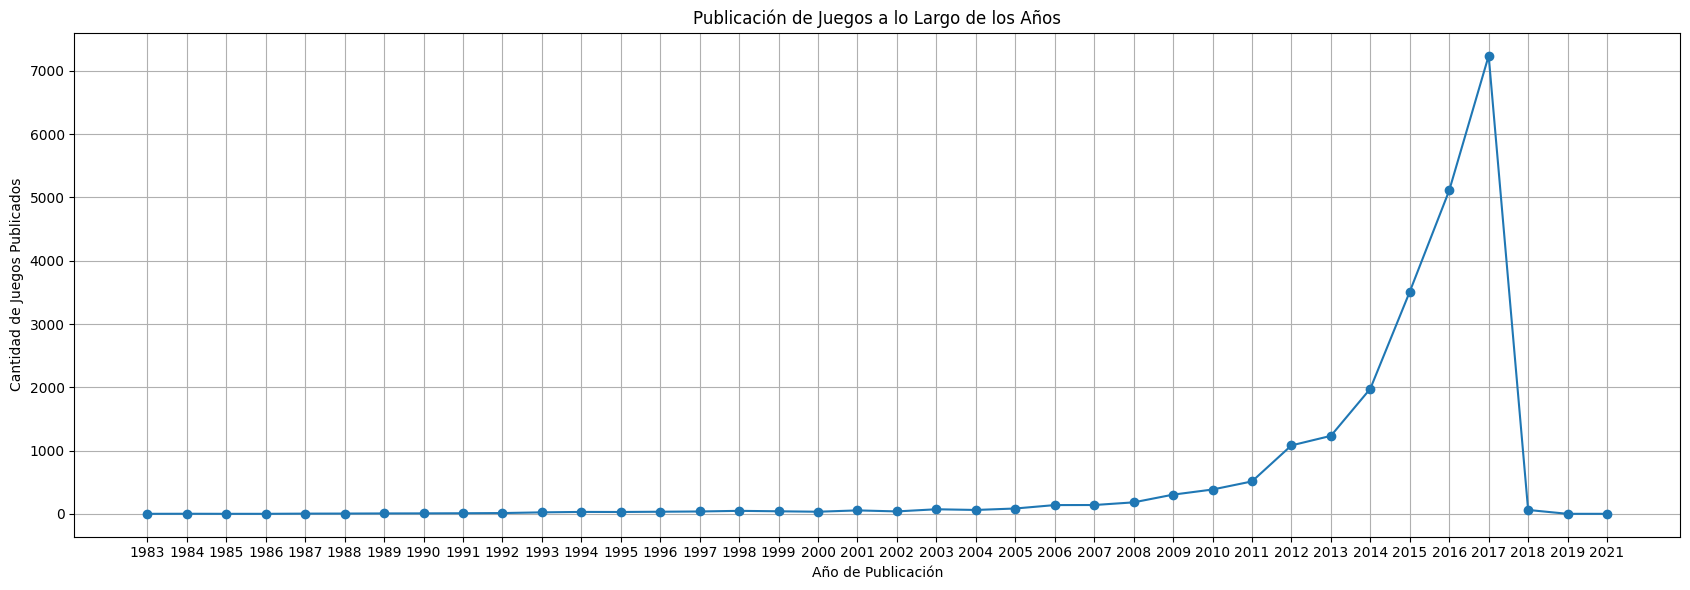

In [50]:
# Contar la cantidad de juegos publicados en cada año
publicaciones_por_año = user_games_final['Release Date'].value_counts().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(17, 6))
plt.plot(publicaciones_por_año.index, publicaciones_por_año.values, marker='o')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Juegos Publicados')
plt.title('Publicación de Juegos a lo Largo de los Años')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

([<matplotlib.axis.XTick at 0x2702e576450>,
 [Text(0, 0, 'REBAS_AS_F-T'),
  Text(1, 0, 'shinomegami'),
  Text(2, 0, 'Sp3ctre'),
  Text(3, 0, 'DownSyndromeKid'),
  Text(4, 0, 'Terminally-Chill'),
  Text(5, 0, 'stopgovtcorruption'),
  Text(6, 0, 'Steamified'),
  Text(7, 0, 'Cow666'),
  Text(8, 0, 'PiozZ'),
  Text(9, 0, 'tobscene')])

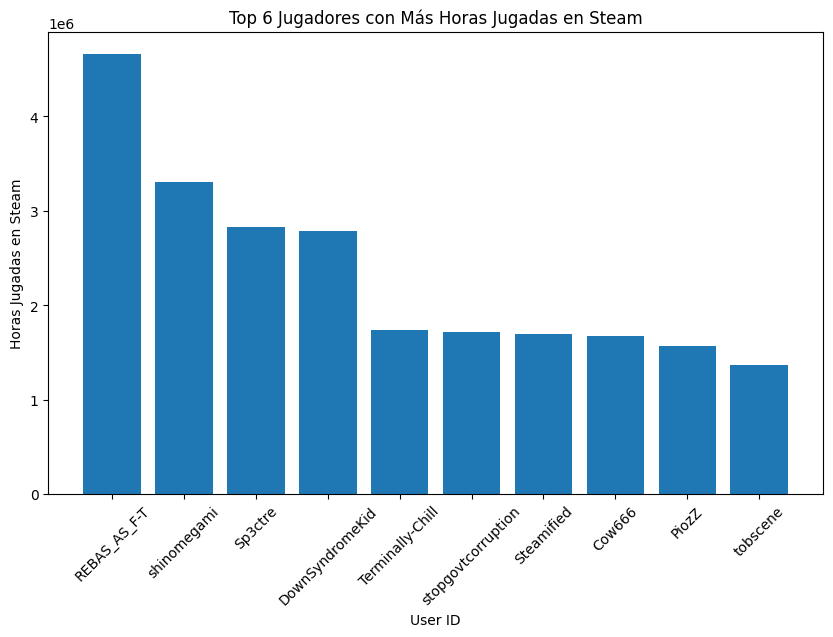

In [56]:
user_playtime = user_items_final.groupby('User ID')['Play Time Forever'].sum().reset_index()
top_players = user_playtime.nlargest(10, 'Play Time Forever')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_players)), top_players['Play Time Forever'])
plt.xlabel('User ID')
plt.ylabel('Horas Jugadas en Steam')
plt.title('Top 6 Jugadores con Más Horas Jugadas en Steam')
plt.xticks(range(len(top_players)), top_players['User ID'], rotation=45)

In [53]:
# Encontrar el valor mínimo (primer año) y el valor máximo (último año)
primer_año = user_games_final['Release Date'].min()
último_año = user_games_final['Release Date'].max()

print(f'Rango de años: {primer_año} - {último_año}')

Rango de años: 1983 - 2021


In [67]:
lanzamiento_por_año = user_games_final["Release Date"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
lanzamiento_por_año

Release Date
2017    7240
2016    5111
2015    3511
2014    1978
2013    1233
2012    1082
2011     513
2010     385
2009     304
2008     182
2007     140
2006     139
2005      85
2003      73
2004      62
2018      62
2001      55
1998      48
1999      41
2002      39
1997      38
1996      34
2000      34
1994      31
1995      30
1993      24
1992      13
1991      10
1990       8
1989       7
1988       5
1987       4
1984       2
1983       1
1986       1
2021       1
2019       1
1985       1
Name: count, dtype: int64

In [57]:
merged_data = pd.merge(user_reviews_final, user_games_final, on='Item ID', how='inner')

# Imprimir el DataFrame resultante
print(merged_data)

                 User ID Item ID  Recommend  Sentiment Analysis  Year  \
0      76561197970982479    1250       True                   2  2011   
1           death-hunter    1250       True                   2  2015   
2               DJKamBer    1250       True                   2  2013   
3              diego9031    1250       True                   1  2015   
4      76561198081962345    1250       True                   1  2014   
...                  ...     ...        ...                 ...   ...   
39937     laislabonita75  367780       True                   0  2015   
39938    evilindiegaming  367780       True                   2  2015   
39939     laislabonita75  305920      False                   0  2015   
39940          Gamer0009  306040       True                   2  2015   
39941        llDracuwulf  307130       True                   2  2015   

                                    Genres            Item Name  \
0                                   Action        Killin

Graficamos para ver los 5 juegos con mas genero

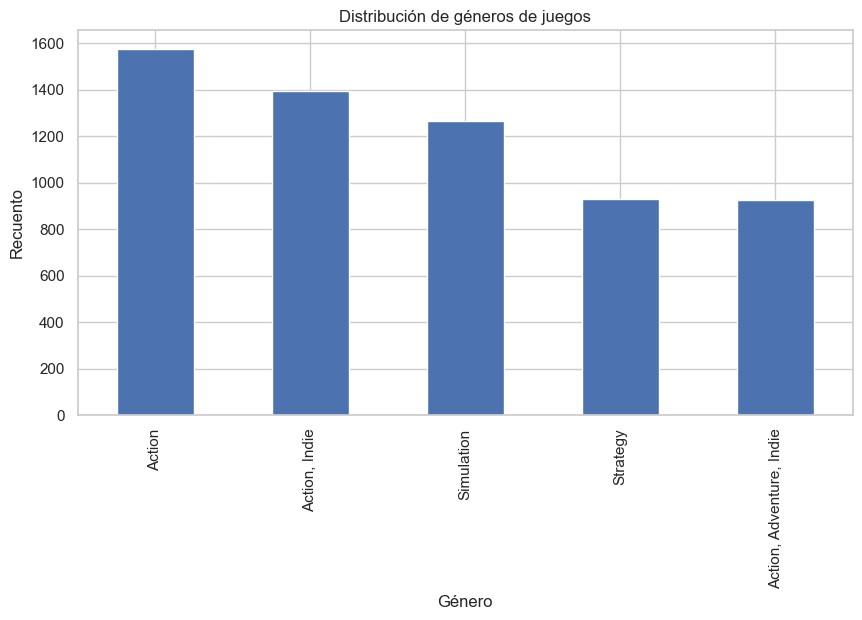

In [66]:
data = user_games_final['Genres'].value_counts().head(5)

plt.figure(figsize=(10,5))
data.plot(kind='bar')
plt.title('Distribución de géneros de juegos')
plt.xlabel('Género')
plt.ylabel('Recuento')
plt.show()

Cantidad de juegos por Desarrolador

In [71]:
developer = user_games_final["Developer"].value_counts() # obtenemos la cantidad de juegos por desarrollador
developer

Developer
Dovetail Games                253
KOEI TECMO GAMES CO., LTD.    180
Ubisoft - San Francisco       178
Capcom                        107
Paradox Development Studio     97
                             ... 
FeatherFan                      1
GMGame                          1
Dunfan Lu                       1
x86-Games                       1
Bidoniera Games                 1
Name: count, Length: 10275, dtype: int64

In [13]:
text = ' '.join(user_items_final['Item Name'].astype(str))

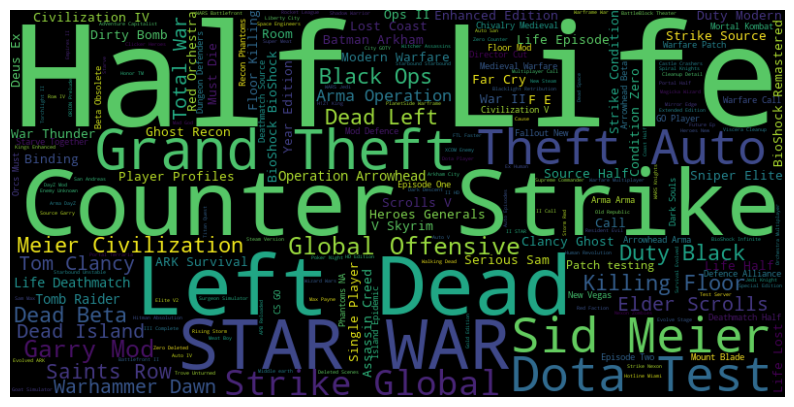

In [14]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Contar la cantidad de juegos para cada categoría
Action_count = user_games_final[user_games_final['Genres'].str.contains('Action', case=False)]['Genres'].count()
Indie_count = user_games_final[user_games_final['Genres'].str.contains('Indie', case=False)]['Genres'].count()
Strategy_count = user_games_final[user_games_final['Genres'].str.contains('Strategy', case=False)]['Genres'].count()
Sport_count = user_games_final[user_games_final['Genres'].str.contains('Sport', case=False)]['Genres'].count()
Adventure_count = user_games_final[user_games_final['Genres'].str.contains('Adventure', case=False)]['Genres'].count()
Simulation_count = user_games_final[user_games_final['Genres'].str.contains('Simulation', case=False)]['Genres'].count()
RPG_count = user_games_final[user_games_final['Genres'].str.contains('RPG', case=False)]['Genres'].count()
print(f'Cantidad de juegos Action: {Action_count}')
print(f'Cantidad de juegos Indie: {Indie_count}')
print(f'Cantidad de juegos Strategy: {Strategy_count}')
print(f'Cantidad de juegos Sport: {Sport_count}')
print(f'Cantidad de juegos Adventure: {Adventure_count}')
print(f'Cantidad de juegos Simulation: {Simulation_count}')
print(f'Cantidad de juegos RPG: {RPG_count}')

Cantidad de juegos Action: 9429
Cantidad de juegos Indie: 12691
Cantidad de juegos Strategy: 5213
Cantidad de juegos Sport: 1032
Cantidad de juegos Adventure: 7020
Cantidad de juegos Simulation: 4724
Cantidad de juegos RPG: 3809


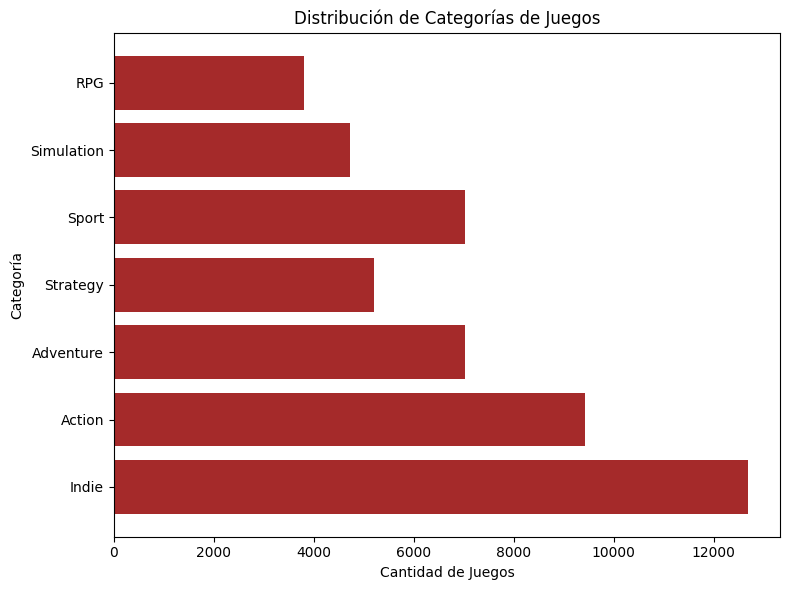

In [16]:
# Crear el gráfico de barras
categorias = ['Indie','Action','Adventure', 'Strategy','Sport','Simulation','RPG','Sport']
conteos = [Indie_count, Action_count,Adventure_count,Strategy_count,Adventure_count,Simulation_count,RPG_count,Sport_count]

plt.figure(figsize=(8, 6))
plt.barh(categorias, conteos, color='#A52A2A')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Categoría')
plt.title('Distribución de Categorías de Juegos')
plt.tight_layout()

# Mostrar el gráfico
plt.show()